Individual challenge:
* **Hackaton: #bdt_hackaton** <br>
* **Author: Miriam Lanabere** <br>
<br>
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBClassifier
from scipy import stats as s
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

!pip install imbalanced-learn

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**LHC sensors**

The Large Hadron Collider (LHC) is the world’s largest and most powerful particle accelerator. It consists of a 27-kilometre ring of superconducting magnets with a number of accelerating structures to boost the energy of the particles along the way. <br>

Inside the LHC, two particle beams travel at close to the speed of light before they are made to collide. The beams travel in opposite directions in separate beam pipes – two tubes kept at ultrahigh vacuum. They are guided around the
accelerator ring by a strong magnetic field maintained by superconducting electromagnets. Below a certain characteristic temperature, some materials enter a superconducting state and offer no resistance to the passage of
electrical current. The electromagnets in the LHC are therefore chilled to ‑271.3°C (1.9K) – a temperature colder than outer space – to take advantage of this effect. The accelerator is connected to a vast distribution system of liquid helium, which cools the magnets, as well as to other supply services. <br>

When hadrons meet during an LHC collision, they break apart and the quarks and gluons come spilling out. They interact and pull more quarks and gluons out of space, eventually forming a shower of fast-moving hadrons. <br>

**The challenge**

Generate a Machine Learning model that allows to predict which particle has been produced after the collision of hadrons from the measurements taken by the LHC sensors.


<a id='Index'></a>
##Index

[Index ▲](#Index)

1. [Dataset](#dataset)
1. [Wrangling, exploration & cleaning](#eda)
1. [Model training](#training)
1. [Model testing](#testing)
1. [Results](#results)

<a id='dataset'></a>
## Dataset
[Index ▲](#Index)

**Introduction**

In particle physics, colliders are used as research tools: they accelerate particles to very high kinetic energies that allow them to collide with other particles. Analysis of the by-products of these collisions provides scientists with good evidence of the structure of the subatomic world and the laws of nature that govern it. Many of these by-products are produced only by high-energy collisions and decay after very short periods of time. Therefore, many of them are difficult or almost impossible to detect in any other way.

**Variables**

This dataset is composed of 10 columns showing the data obtained by the LHC sensors after the collision of particles: <br>
*   alpha_1
*   alpha_2
*   alpha_3
*   beta_1
*   beta_2
*   beta_3
*   gamma_1
*   gamma_2
*   gamma_3
*   theta

The eleventh column is the average noise measured by all the sensors: <br>
*   noise

And the last column is the one that represents the elemental particle that has been created by the high-energy collision of particles: <br>
*   Particle --> **Target**

**Source**

The dataset has been specially created for this challenge by Nuwe

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Hackaton/particles.csv", sep=",")
df.head()

,alpha_1,alpha_2,alpha_3,beta_1,beta_2,beta_3,gamma_1,gamma_2,gamma_3,theta,noise,Particle
0,NaN,-59.730861,396.928619,9.761703,-137.558889,159.598109,-137.558889,53.930955,154.713810,-232.436087,99.243140,3
1,147.781782,153.729532,111.998962,-174.941235,-97.888332,26.493593,-97.888332,-30.506871,-166.347802,-195.010710,20.242743,0
2,242.220616,82.947635,-102.073856,116.334349,-101.746729,176.452824,-101.746729,-33.419984,44.082548,-173.928682,3.806943,1
3,140.542085,-110.129037,215.560355,-11.927860,-11.257902,21.648833,-11.257902,240.685681,133.441269,-276.382025,0.336025,0
4,169.367809,-92.182925,159.995515,-272.230740,-80.483153,-97.698901,-80.483153,16.251613,-13.177148,-100.316959,24.459551,0


<a id='eda'></a>
## Wrangling, exploration & cleaning
[Index ▲](#Index)

**Shape, size & type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127321 entries, 0 to 127320
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha_1   109132 non-null  float64
 1   alpha_2   127321 non-null  float64
 2   alpha_3   127321 non-null  float64
 3   beta_1    127321 non-null  float64
 4   beta_2    127131 non-null  float64
 5   beta_3    127206 non-null  float64
 6   gamma_1   127321 non-null  float64
 7   gamma_2   126594 non-null  float64
 8   gamma_3   117897 non-null  float64
 9   theta     126595 non-null  float64
 10  noise     127321 non-null  float64
 11  Particle  127321 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 11.7 MB


**Descriptive statistics**

In [ ]:
df.describe()

,alpha_1,alpha_2,alpha_3,beta_1,beta_2,beta_3,gamma_1,gamma_2,gamma_3,theta,noise,Particle
count,109132.000000,127321.000000,127321.000000,127321.000000,127131.000000,127206.000000,127321.000000,126594.000000,117897.000000,126595.000000,127321.000000,127321.000000
mean,-10.713873,-0.270224,49.546923,7.508049,46.853638,0.451485,46.845556,-0.040888,-20.881407,-61.594057,50.126020,1.647804
std,152.987128,100.044696,221.503776,164.993428,160.134335,99.979061,160.142626,99.797656,160.637008,146.954921,28.848755,1.470649
min,-779.841923,-391.102365,-1263.945127,-701.930722,-655.626984,-448.118855,-655.626984,-435.684650,-719.937495,-653.437102,0.000390,0.000000
25%,-118.765902,-68.036224,-102.428650,-109.328232,-59.311413,-66.838936,-59.320379,-67.011881,-133.157334,-158.912087,25.125602,0.000000
50%,-0.787086,-0.112444,48.483502,6.053932,55.785954,0.571383,55.772838,-0.265758,-14.309868,-75.169482,50.213148,2.000000
75%,101.815933,66.895676,198.157415,123.154096,155.939039,67.675433,155.939228,66.893239,95.426099,20.771011,75.115084,2.000000
max,698.044837,444.209708,1383.265329,666.078562,726.063419,448.925730,726.063419,544.546234,682.413287,689.548943,99.993348,7.000000


Text(0.5, 1.0, 'Particle vs Alpha_1')

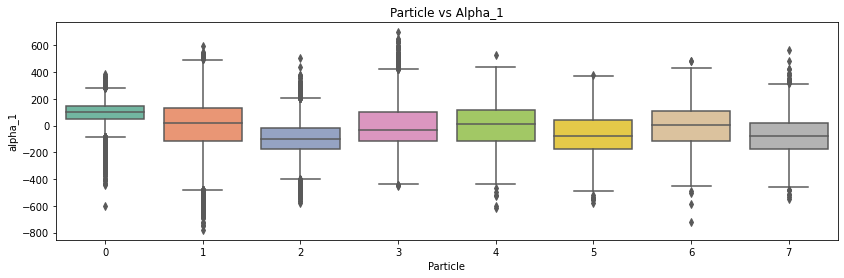

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['alpha_1'],palette= "Set2").set_title('Particle vs Alpha_1')

Text(0.5, 1.0, 'Particle vs Alpha_2')

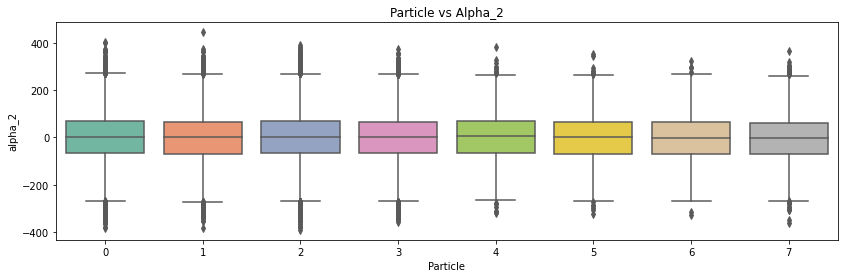

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['alpha_2'],palette= "Set2").set_title('Particle vs Alpha_2')

Text(0.5, 1.0, 'Particle vs Alpha_3')

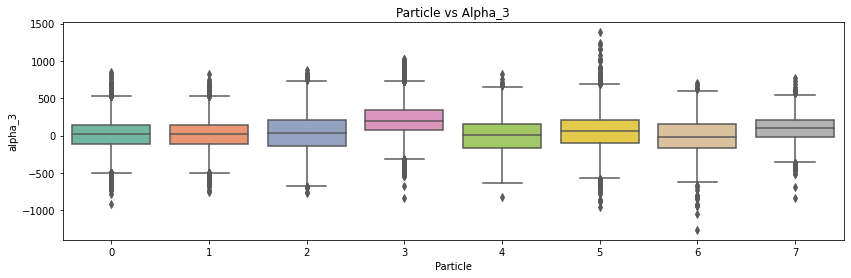

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['alpha_3'],palette= "Set2").set_title('Particle vs Alpha_3')

Text(0.5, 1.0, 'Particle vs beta_1')

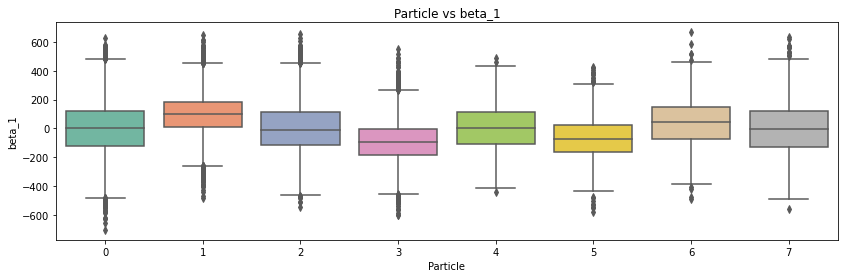

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['beta_1'],palette= "Set2").set_title('Particle vs beta_1')

Text(0.5, 1.0, 'Particle vs beta_2')

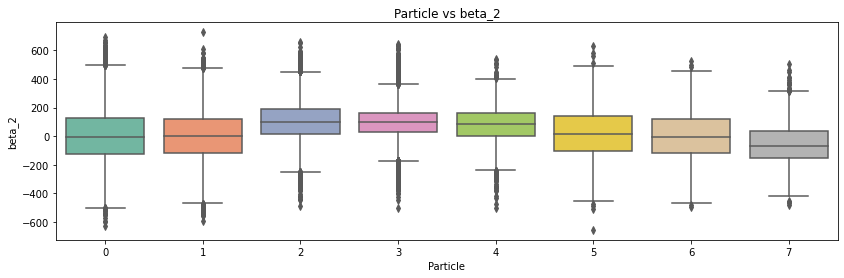

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['beta_2'],palette= "Set2").set_title('Particle vs beta_2')

Text(0.5, 1.0, 'Particle vs beta_1')

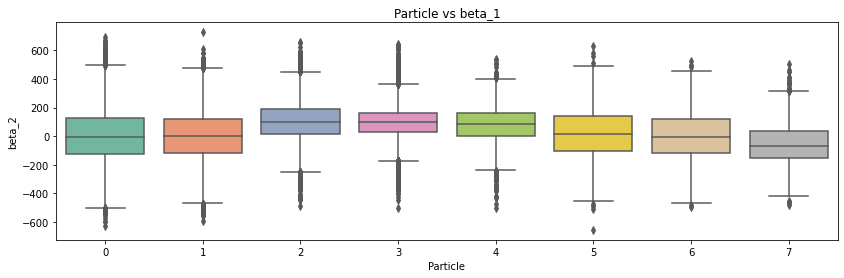

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['beta_2'],palette= "Set2").set_title('Particle vs beta_1')

Text(0.5, 1.0, 'Particle vs gamma_1')

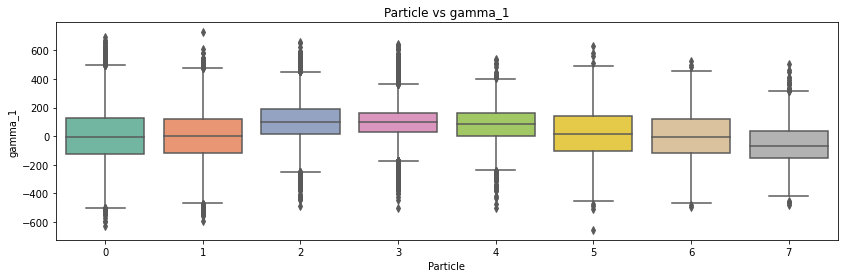

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['gamma_1'],palette= "Set2").set_title('Particle vs gamma_1')

Text(0.5, 1.0, 'Particle vs gamma_2')

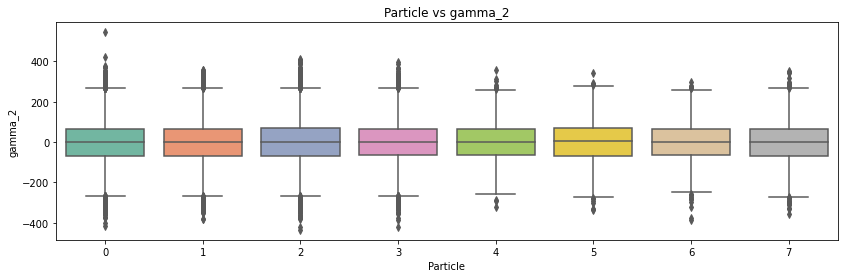

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['gamma_2'],palette= "Set2").set_title('Particle vs gamma_2')

Text(0.5, 1.0, 'Particle vs gamma_3')

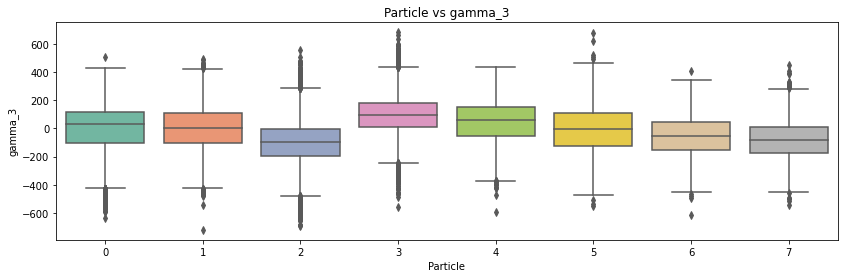

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['gamma_3'],palette= "Set2").set_title('Particle vs gamma_3')

Text(0.5, 1.0, 'Particle vs theta')

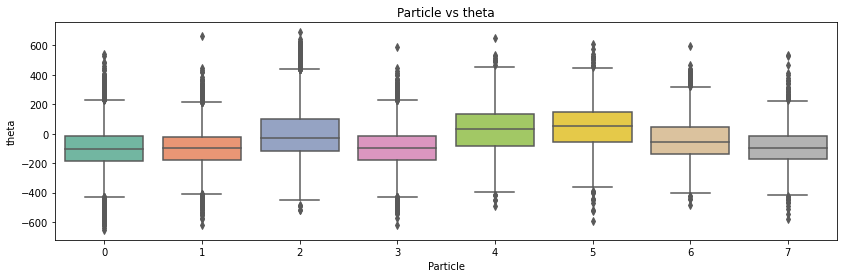

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['theta'],palette= "Set2").set_title('Particle vs theta')

Text(0.5, 1.0, 'Particle vs noise')

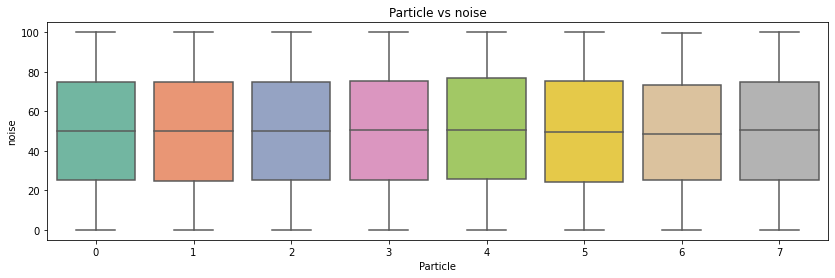

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['Particle'], y=df['noise'],palette= "Set2").set_title('Particle vs noise')

**Unbalanced classes**

Text(0.5, 1.0, 'Target distribution')

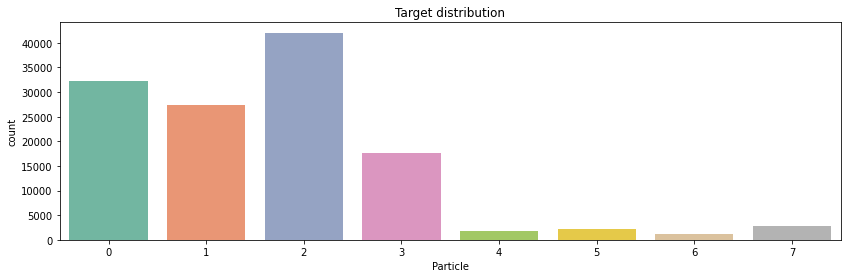

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x= 'Particle', data= df, palette= "Set2").set_title('Target distribution')

**Nulls average**

In [ ]:
avg_nulls = ((df.isnull().sum()) / 127321)*100
avg_nulls.round(2)

alpha_1     14.29
alpha_2      0.00
alpha_3      0.00
beta_1       0.00
beta_2       0.15
beta_3       0.09
gamma_1      0.00
gamma_2      0.57
gamma_3      7.40
theta        0.57
noise        0.00
Particle     0.00
dtype: float64

**Null imputation**

In [ ]:
def fill_mean (column,target):
    null_mask = (df[column].isnull()) 
    print('Antes: ',null_mask.sum())
    unique = df[target].unique()
    for VU in unique:
        mask_Posicion  = (df[target] == VU) & (df[column].isnull())
        df[column].fillna(df[df[target] == VU][column].mean(), inplace=True)
    null_mask = (df[column].isnull()) 
    print('despues: ',null_mask.sum())

In [ ]:
fill_mean('alpha_1','Particle')

Antes:  18189
despues:  0


In [ ]:
fill_mean('beta_2','Particle')

Antes:  190
despues:  0


In [ ]:
fill_mean('beta_3','Particle')

Antes:  115
despues:  0


In [ ]:
fill_mean('gamma_2','Particle')

Antes:  727
despues:  0


In [ ]:
fill_mean('gamma_3','Particle')

Antes:  9424
despues:  0


In [ ]:
fill_mean('theta','Particle')

Antes:  726
despues:  0


In [ ]:
df.isnull().sum()

alpha_1     0
alpha_2     0
alpha_3     0
beta_1      0
beta_2      0
beta_3      0
gamma_1     0
gamma_2     0
gamma_3     0
theta       0
noise       0
Particle    0
dtype: int64

<a id='training'></a>
## Model training
[Index ▲](#Index)

In [ ]:
X = df.drop(['Particle'], axis = 1)
y = df['Particle']

**Strategy for minority classes**

In [ ]:
# OverSampling del dataset

oversample = SMOTE()
X_os, y_os = oversample.fit_resample(X, y)

print('X_os:',X.shape)
print(pd.DataFrame(y_os).value_counts())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

X_os: (127321, 11)
7    42060
6    42060
5    42060
4    42060
3    42060
2    42060
1    42060
0    42060
dtype: int64


**Train test split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os, y_os,test_size=0.33, random_state=42)
scaler = StandardScaler()
    
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

print("X_train: ",X_train.shape)
print("X_test: ", X_test.shape)
print("-----------------------")
print("y_train: ", pd.DataFrame(y_train).value_counts())
print("y_test: ", pd.DataFrame(y_test).value_counts())

X_train:  (225441, 11)
X_test:  (111039, 11)
-----------------------
y_train:  4    28383
0    28329
6    28267
1    28190
2    28115
5    28069
7    28055
3    28033
dtype: int64
y_test:  3    14027
7    14005
5    13991
2    13945
1    13870
6    13793
0    13731
4    13677
dtype: int64


Text(0.5, 1.0, 'Train: target distribution')

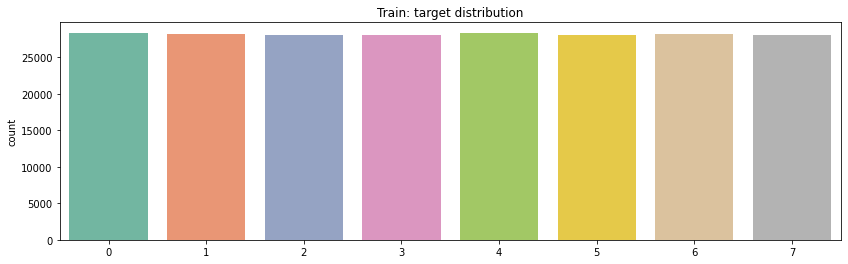

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x = y_train, data= pd.DataFrame(y_train), palette= "Set2").set_title("Train: target distribution")

Text(0.5, 1.0, 'Test: target distribution')

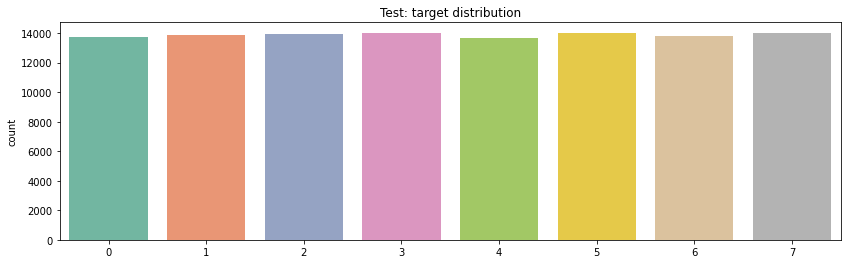

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x= y_test, data= pd.DataFrame(y_test), palette= "Set2").set_title("Test: target distribution")

**KNClassifier**

**Select n neighbours**

In [ ]:
def scores_knn(X, y, start, stop, step):

    scores_para_df = []
    
    
    for i in range(start,stop,step):

        model = KNeighborsClassifier(n_neighbors=i)

        kf = KFold(n_splits=3, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        scores_para_df.append(dict_row_score)

    df_scores = pd.DataFrame(scores_para_df)

    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    return df_scores

In [ ]:
df_scores = scores_knn(X_train, pd.DataFrame(y_train).values.reshape(-1), 2, 5, 1)
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.835478,0.001571,2,0.833907,0.837049
1,0.812195,0.000621,3,0.811574,0.812816
2,0.810642,0.001198,4,0.809444,0.811841


In [ ]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.835478,0.001571,2,0.833907,0.837049


In [ ]:
best_k= df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

2

**KNNClassifier model**

In [ ]:
model_knn= KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, pd.DataFrame(y_train).values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
accuracy_score(y_train, model_knn.predict(X_train))

0.962469116088023

<a id='testing'></a>
## Model testing
[Index ▲](#Index)

In [ ]:
y_pred= model_knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8627239078161727

**Confusion matrix**

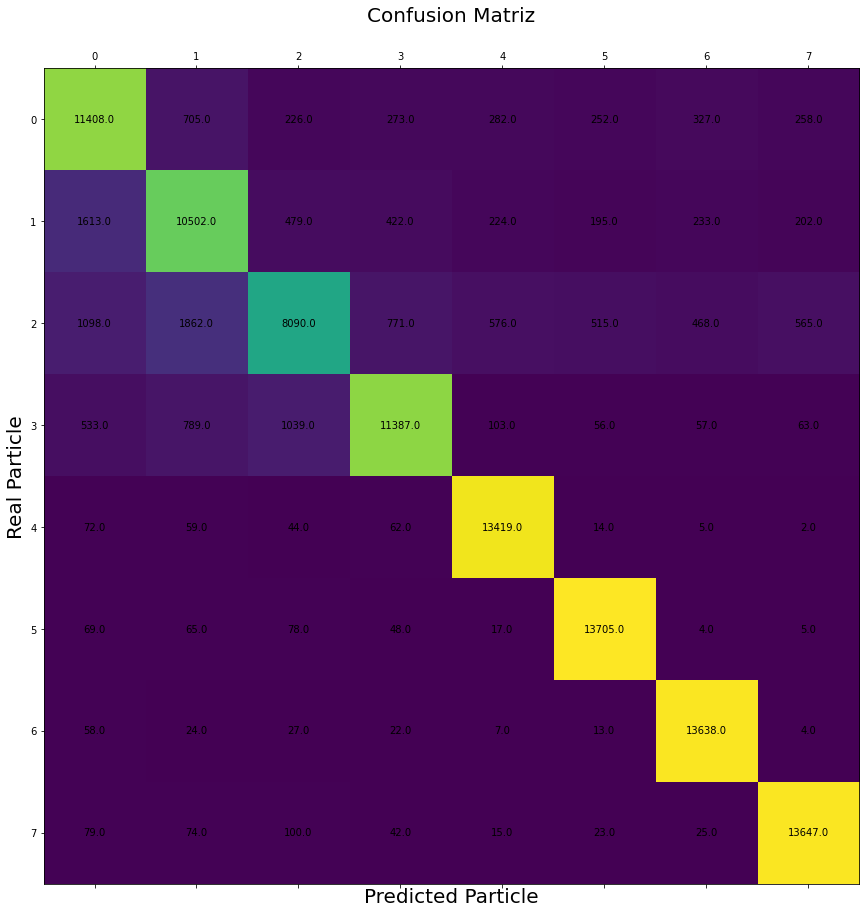

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (15,15))
ax.matshow(cm)
plt.title('Confusion Matriz', fontsize=20)
plt.ylabel('Real Particle', fontsize=20)
plt.xlabel('Predicted Particle', fontsize=20)
for (i,j), z in np.ndenumerate(cm):
	ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

<a id='results'></a>
## Results
[Index ▲](#Index)

**Report score: precision, recall, f1-score and support**

In [ ]:
classif_report = classification_report(y_test, y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.76      0.83      0.80     13731
           1       0.75      0.76      0.75     13870
           2       0.80      0.58      0.67     13945
           3       0.87      0.81      0.84     14027
           4       0.92      0.98      0.95     13677
           5       0.93      0.98      0.95     13991
           6       0.92      0.99      0.96     13793
           7       0.93      0.97      0.95     14005

    accuracy                           0.86    111039
   macro avg       0.86      0.86      0.86    111039
weighted avg       0.86      0.86      0.86    111039

